Final Project - Telecom Churn Analysis


KNN

In [20]:
!pip install dmba
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

Load Data


In [15]:
churn_df = pd.read_csv('cleaned_churn.csv')
churn_df = churn_df.drop(churn_df.columns[0],axis=1)
churn_df.head(9)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,2,2,5,1
1,1,36147,0,13,800586,244,0,6,2,2,2,1
2,1,27273,230,0,305049,201,16,15,2,1,3,1
3,0,120070,38,33,788235,780,3,2,2,5,2,0
4,1,29215,208,85,224784,241,21,1,1,2,4,1
5,0,133728,64,48,632969,626,3,2,2,4,5,1
6,0,42052,224,0,697949,191,10,5,1,2,1,1
7,1,84744,0,20,688098,357,0,5,1,2,2,1
8,0,38171,0,7,274218,190,0,5,5,2,1,1


Partition Data into training and testing

In [16]:
trainData, validData = train_test_split(churn_df, test_size=0.4, random_state=26)
print(trainData.shape, validData.shape)

(12000, 12) (8000, 12)


Scatter plot of original data (select house and overage for visualization)

In [24]:
trainData

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
9992,0,145565,0,20,367822,852,1,4,5,2,2,0
16008,0,27281,187,78,191955,169,22,1,5,5,4,0
13220,1,153801,0,20,940838,448,1,5,1,2,4,1
11309,1,69605,71,0,292979,602,4,8,4,1,2,1
10118,1,74098,34,8,445875,835,4,5,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7620,0,141543,0,0,525488,633,1,14,4,5,1,1
6304,1,47311,224,83,311732,789,17,1,5,5,1,0
10202,0,49876,196,0,190200,199,17,8,5,1,2,0
10177,1,69586,225,19,730406,256,14,5,1,2,5,1


ValueError: ignored

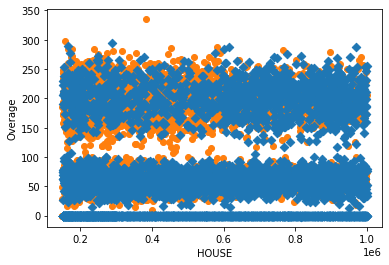

In [30]:
fig, ax = plt.subplots()

subset = trainData.loc[trainData['LEAVE']==0]
ax.scatter(subset.HOUSE, subset.OVERAGE, marker='o', label='Stay', color='C1')

subset = trainData.loc[trainData['LEAVE']==1]
ax.scatter(subset.HOUSE, subset.OVERAGE, marker='D', label='Leave', color='C0')

plt.xlabel('HOUSE')  # set x-axis label
plt.ylabel('Overage')  # set y-axis label
for _, row in trainData.iterrows():
    ax.annotate(row.index, (row.HOUSE + 2, row.OVERAGE))
   

handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 115)
ax.legend(handles, labels, loc=4)

plt.show()

Preprocess: Normalize for KNN

In [0]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['COLLEGE','INCOME','OVERAGE','LEFTOVER','HOUSE','HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','AVERAGE_CALL_DURATION','REPORTED_SATISFACTION',	'REPORTED_USAGE_LEVEL',	'CONSIDERING_CHANGE_OF_PLAN']])  # Note the use of an array of column names

# Transform the full dataset
churnNorm = pd.concat([pd.DataFrame(scaler.transform(churn_df[['COLLEGE','INCOME','OVERAGE','LEFTOVER','HOUSE','HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','AVERAGE_CALL_DURATION','REPORTED_SATISFACTION',	'REPORTED_USAGE_LEVEL',	'CONSIDERING_CHANGE_OF_PLAN']]), 
                                    columns=['zCOLLEGE','zINCOME','zOVERAGE','zLEFTOVER','zHOUSE','zHANDSET_PRICE','zOVER_15MINS_CALLS_PER_MONTH','zAVERAGE_CALL_DURATION','zREPORTED_SATISFACTION',	'zREPORTED_USAGE_LEVEL',	'zCONSIDERING_CHANGE_OF_PLAN']),
                       churn_df[['LEAVE']]], axis=1)
trainNorm = churnNorm.iloc[trainData.index]
validNorm = churnNorm.iloc[validData.index]

Hyperparameter Tuning: choose K

In [33]:
train_X = trainNorm[['zCOLLEGE','zINCOME','zOVERAGE','zLEFTOVER','zHOUSE','zHANDSET_PRICE','zOVER_15MINS_CALLS_PER_MONTH','zAVERAGE_CALL_DURATION','zREPORTED_SATISFACTION',	'zREPORTED_USAGE_LEVEL',	'zCONSIDERING_CHANGE_OF_PLAN']]
train_y = trainNorm['LEAVE']
valid_X = validNorm[['zCOLLEGE','zINCOME','zOVERAGE','zLEFTOVER','zHOUSE','zHANDSET_PRICE','zOVER_15MINS_CALLS_PER_MONTH','zAVERAGE_CALL_DURATION','zREPORTED_SATISFACTION',	'zREPORTED_USAGE_LEVEL',	'zCONSIDERING_CHANGE_OF_PLAN']]
valid_y = validNorm['LEAVE']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.600375
1    2  0.596375
2    3  0.629500
3    4  0.623500
4    5  0.643125
5    6  0.640500
6    7  0.647625
7    8  0.649125
8    9  0.654250
9   10  0.653750
10  11  0.655500
11  12  0.653500
12  13  0.659000
13  14  0.657250


Confustion Matrix

In [0]:
# pick k = 13
knn = KNeighborsClassifier(n_neighbors=13).fit(train_X, train_y)
valid_y_pred = knn.predict(valid_X)

In [35]:
# Validation
classificationSummary(valid_y, valid_y_pred, class_names=['0','1']) 

Confusion Matrix (Accuracy 0.6590)

       Prediction
Actual    0    1
     0 2519 1389
     1 1339 2753


Naive Bayes

Import Packages

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

no display found. Using non-interactive Agg backend


In [0]:
predictors = ['COLLEGE','INCOME','OVERAGE','LEFTOVER','HOUSE','HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','AVERAGE_CALL_DURATION','REPORTED_SATISFACTION',	'REPORTED_USAGE_LEVEL',	'CONSIDERING_CHANGE_OF_PLAN']
outcome = 'LEAVE'

X = churn_df[predictors]
y = churn_df['LEAVE']
classes = list(y)

# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# run naive Bayes
churn_nb = MultinomialNB(alpha=0.01)
churn_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = churn_nb.predict_proba(X_train)
predProb_valid = churn_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = churn_nb.predict(X_valid)
y_train_pred = churn_nb.predict(X_train)

Construct a Frequency Table

In [0]:
# split the original data frame into a train and test using the same random_state
train_df, valid_df = train_test_split(churn_df, test_size=0.4, random_state=1)

pd.set_option('precision', 4)
# probability of churn
print(churn_df['LEAVE'].value_counts() / len(churn_df))
print()

for predictor in predictors:
    # construct the frequency table
    df = churn_df[['LEAVE', predictor]]
    freqTable = df.pivot_table(index='LEAVE', columns=predictor, aggfunc=len)

    # divide each row by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()
pd.reset_option('precision')

Confusion Matrix

In [13]:
# Validation
classificationSummary(y_valid, y_valid_pred, class_names=['0','1']) 

Confusion Matrix (Accuracy 0.5776)

       Prediction
Actual    0    1
     0 2252 1681
     1 1698 2369


Gain Chart

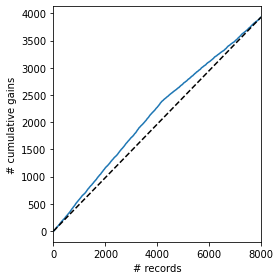

In [48]:
df = pd.DataFrame({'actual': 1 - y_valid, 'prob': predProb_valid[:, 0]})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
gainsChart(df.actual, ax=ax)

plt.tight_layout()
plt.show()